<h1> Explicit Runge-Kutta: 3D Heat Equation
</h1>

     tspan: [0 0.2000]
     nvals: [40 80 120 160 200 240 280 320]
      diff: 0.0100
      rtol: 1.0000e-05
      atol: 1.0000e-12
    tt_tol: 1.0000e-05
     mname: 'Fehlberg-ERK'
    uexact: @(t,x,y,z)sin(pi*x).*sin(pi*x).*sin(pi*y).*sin(pi*y).*sin(pi*z).*sin(pi*z).*cos(pi*t).*cos(pi*t)

     tspan: [0 0.2000]
     nvals: [40 80 160 320 640 1280]
      diff: 0.0100
      rtol: 1.0000e-05
      atol: 1.0000e-12
    tt_tol: 1.0000e-05
     mname: 'Fehlberg-ERK'
    uexact: @(t,x,y,z)sin(pi*x).*sin(pi*x).*sin(pi*y).*sin(pi*y).*sin(pi*z).*sin(pi*z).*cos(pi*t).*cos(pi*t)



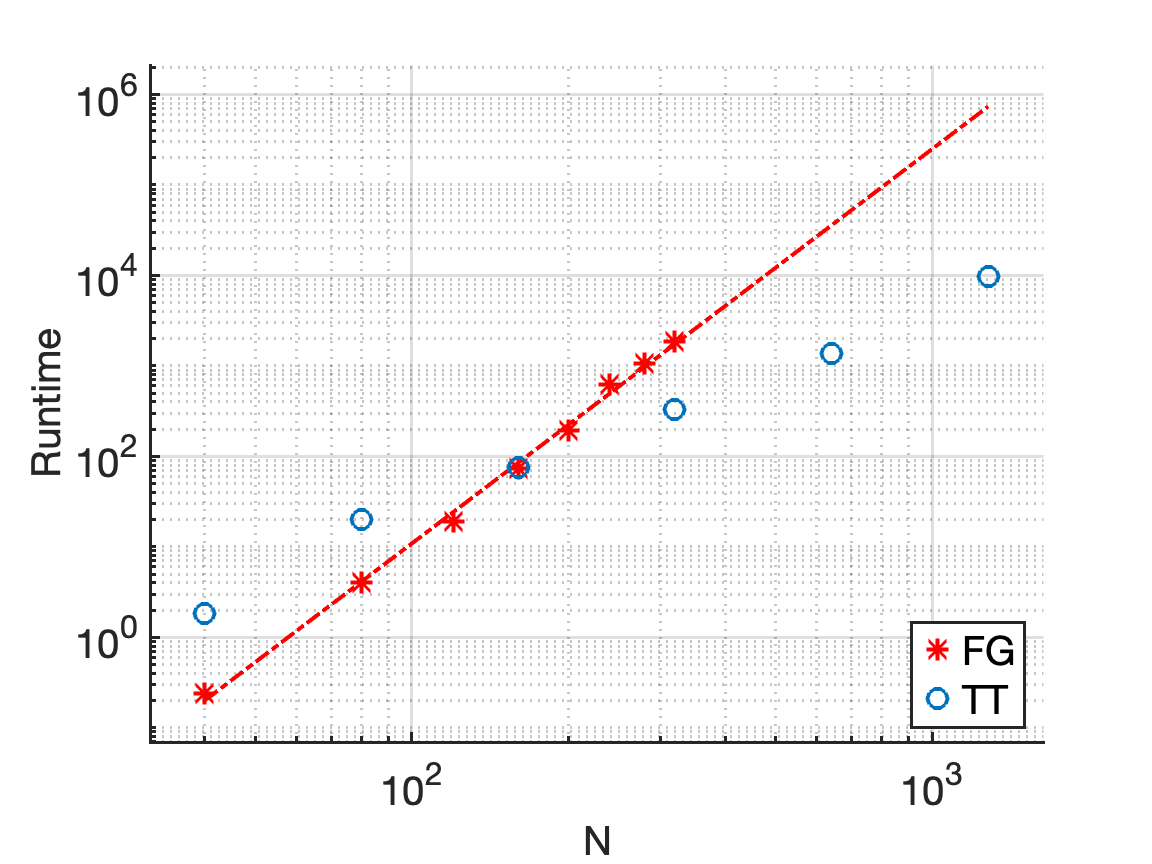

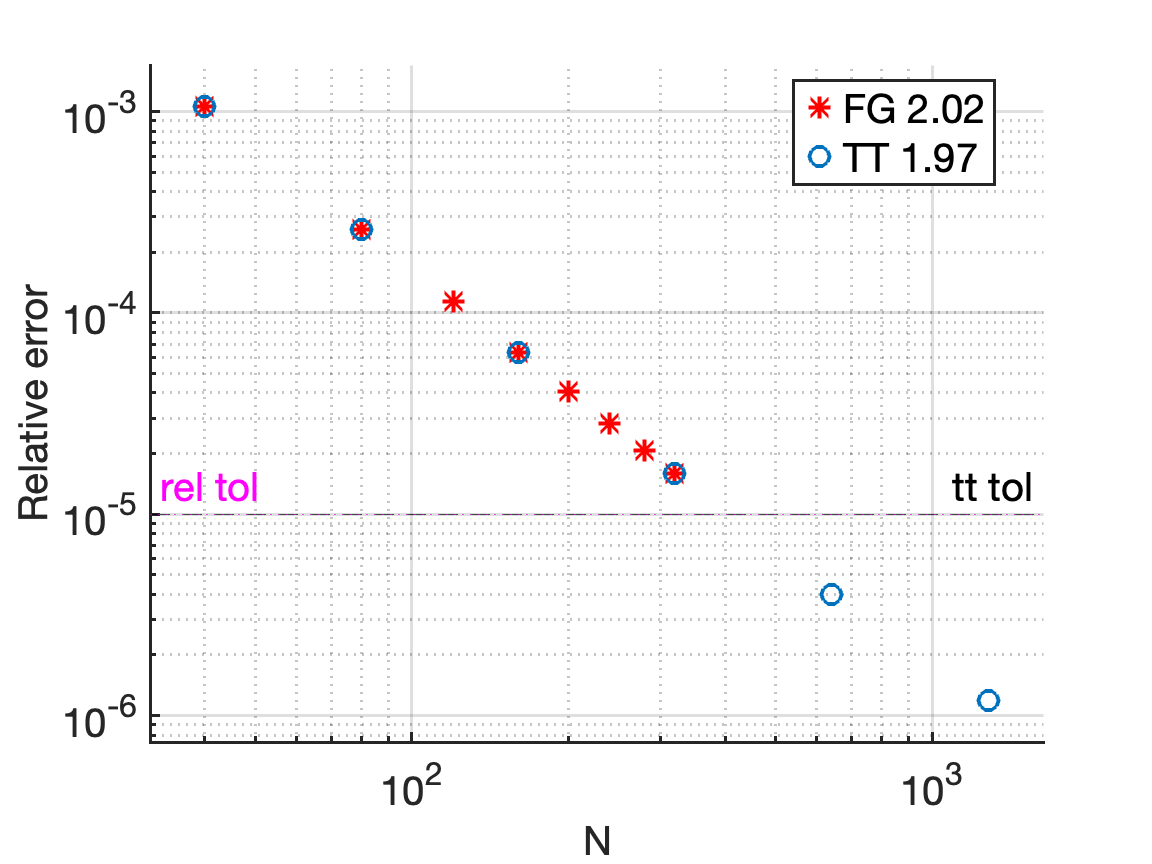

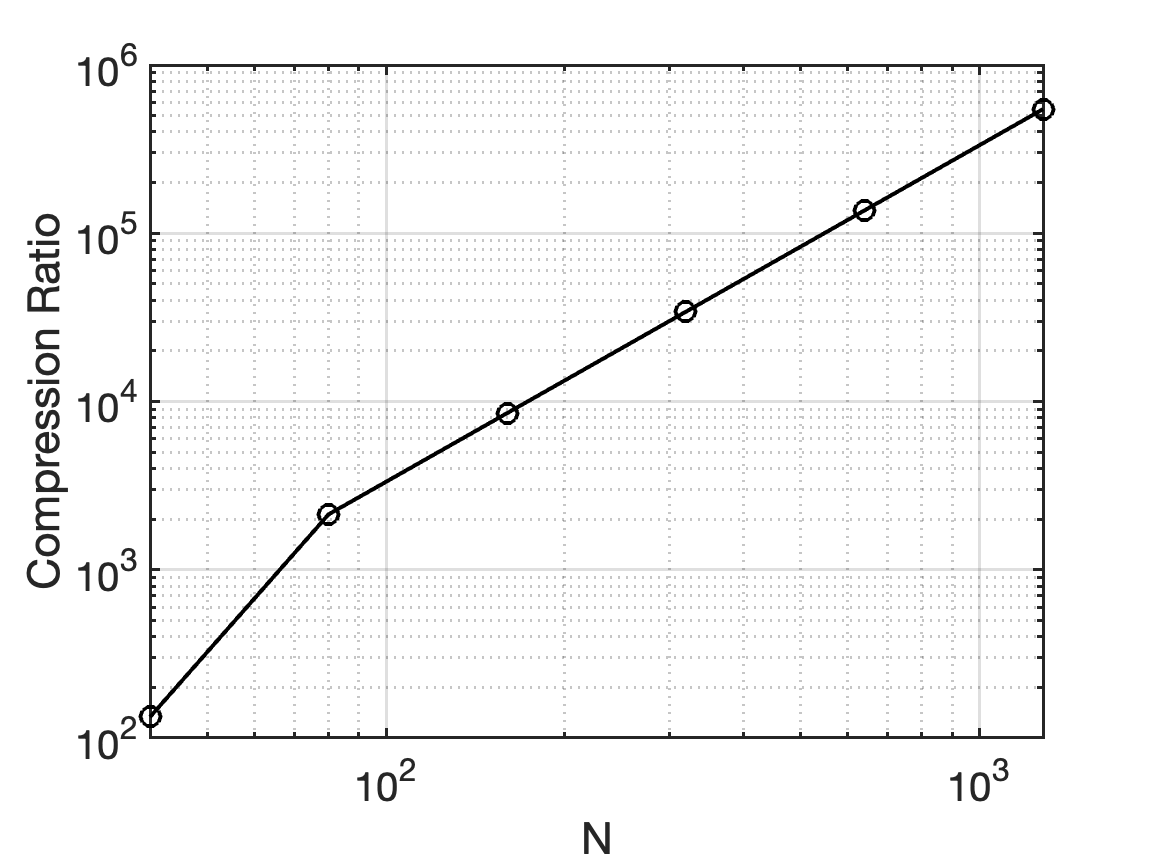

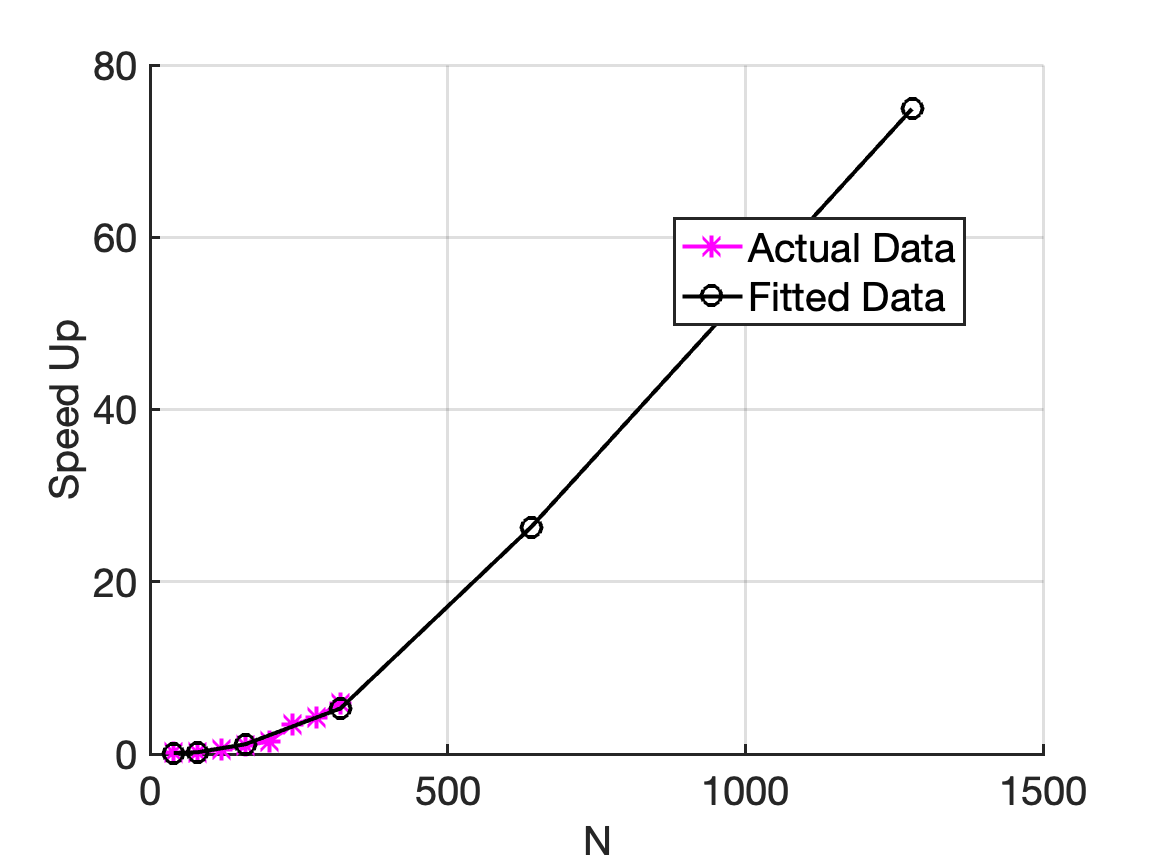

In [1]:
% Plots for presentation

warning('off', 'all')

close all; clear;
p = load('h3D_driver_Fehlberg-ERK.mat'); % load fg data 
q = load('h3D_driver_tt_Fehlberg-ERK.mat'); % load tt data 

Rtt = q.R; 
Rfg = p.R;
Rtt = Rtt(~cellfun('isempty',Rtt)) ; 

inputfg = Rfg{1}.input;
inputtt = Rtt{1}.input;
Nfg = inputfg.nvals;
Ntt = inputtt.nvals(1:length(Rtt));

disp(inputfg)
disp(inputtt)

% time
timefg = cellfun(@(c) c.timefg, Rfg);
timett = cellfun(@(c) c.timett, Rtt);
timettfg = cellfun(@(c) c.timett, Rfg);

% number of steps
fg_steps = cellfun(@(c) c.fg_steps,Rfg);
tt_steps = cellfun(@(c) c.tt_steps, Rtt);
tt_steps1 = cellfun(@(c) c.tt_steps,Rfg);

% number of failed steps 
fg_steps_fail = cellfun(@(c) c.fgerkoutput.nfail,Rfg);
tt_steps_fail = cellfun(@(c) c.tterkoutput.nfail, Rtt);
tt_steps_fail1 = cellfun(@(c) c.tterkoutput.nfail, Rfg);

% time per step (average)
timeperstep_fg = timefg./fg_steps;
timeperstep_tt = timett./tt_steps;
timeperstep_tt1 = timettfg./tt_steps1;

% abs and rel error
fgerror_abs = cellfun(@(c) c.fgerror_abs, Rfg);
fgerror_rel = cellfun(@(c) c.fgerror_rel, Rfg);
tterror_abs = cellfun(@(c) c.tterror_abs, Rtt);
tterror_rel = cellfun(@(c) c.tterror_rel, Rtt);

% rank
rank = cellfun(@(c) c.tterkoutput.rank, Rtt, 'UniformOutput',0);
maxrank = cellfun(@(c) max(c), rank);

% Step size data 
fg_dtvals = cellfun(@(c) c.fgerkoutput.dtvals, Rfg, 'UniformOutput',0);
fg_dtmin = cellfun(@(c) min(c), fg_dtvals);
fg_dtmax = cellfun(@(c) max(c), fg_dtvals);

tt_dtvals = cellfun(@(c) c.tterkoutput.dtvals,Rtt,'UniformOutput',0);
tt_dtmin = cellfun(@(c) min(c), tt_dtvals);
tt_dtmax = cellfun(@(c) max(c), tt_dtvals);

tt_dtvals1 = cellfun(@(c) c.tterkoutput.dtvals,Rfg,'UniformOutput',0);
tt_dtmin1 = cellfun(@(c) min(c), tt_dtvals1);
tt_dtmax1 = cellfun(@(c) max(c), tt_dtvals1);

Nadd = [Ntt,Nfg];
tt_dtmin_add = [tt_dtmin,tt_dtmin1];
tt_dtmax_add = [tt_dtmax,tt_dtmax1];

ttcolor = [0 0.4470 0.7410]; %blueish
fgcolor = [1 0 0]; %red
ttmark = 'o';
fgmark = '*';

%% Get slopes
% Lines through N vs total time 
sfg_time = polyfit(log10(Nfg), log10(timefg),1);
stt_time = polyfit(log10(Ntt),log10(timett),1);

% Extrapolated FG N vs total time 
log_yfg = polyval(sfg_time,log10(Ntt));
yfg = 10.^(log_yfg);

% Lines through N vs time per step
sfg_time_per_step = polyfit(log10(Nfg), log10(timeperstep_fg),1);
stt_time_per_step = polyfit(log10(Ntt),log10(timeperstep_tt),1);

% Extrapolated FG N vs time per step
log_yfg_step = polyval(sfg_time_per_step,log10(Ntt));
yfg_step = 10.^(log_yfg_step);

% Lines through N vs relerror
sfg_relerror = polyfit(log10(Nfg), log10(fgerror_rel),1);
stt_relerror = polyfit(log10(Ntt), log10(tterror_rel),1);

% Lines through N vs abserror
sfg_abserror = polyfit(log10(Nfg), log10(fgerror_abs),1);
stt_abserror = polyfit(log10(Ntt), log10(tterror_abs),1);

% Lines through N vs nsteps 
sfg_steps = polyfit(log10(Nfg), log10(fg_steps),1);
stt_steps = polyfit(log10(Ntt), log10(tt_steps),1);

% Speed up 
speed_up = timefg./timettfg; % actual data
speed_up_extrap = yfg./timett; % fitted line data

% Compression Ratio
compr_ratio = (Ntt.^3)./((maxrank.^2).*Ntt*3);

% fgname = ['FG ', num2str(sfg_time(1),'%.2f')];
% ttname = ['TT ', num2str(stt_time(1),'%.2f')];
fgname = 'FG';
ttname = 'TT';

%% === (1) Define common “presentation” settings ===
% Choose width/height for figure
figWidth  = 8;   % inches
figHeight = 6;   % inches

%— Font size, line width, marker size for all axes/lines:
bigFont    = 20;  % points
bigLine    = 2;   % line width
bigMarker  = 10;   % marker size

%— Tweak MATLAB’s “root” defaults so that every new figure/axes/line uses these:
set(groot, ...
    'DefaultFigureUnits',      'inches', ...
    'DefaultFigurePosition',   [1 1 figWidth figHeight], ...  % [left bottom width height]
    'DefaultFigureColor',      'w', ...                        % white background
    'DefaultAxesFontSize',     bigFont, ...
    'DefaultAxesLineWidth',    1.5, ...      % axes‐box line width
    'DefaultLineLineWidth',    bigLine, ...
    'DefaultLineMarkerSize',   bigMarker);

folderName = './';

%% === (2) First figure: Runtime vs N (log‐log) ===
h1 = figure;
hold on;
%— Plot FG data:
loglog(Nfg, timefg, ...
    'Color', fgcolor, ...
    'Marker', fgmark, ...
    'LineStyle', 'none', ...
    'DisplayName', fgname);

%— Plot FG fitted line:
loglog(Ntt, yfg, ...
    'Color', fgcolor, ...
    'LineStyle', '-.', ...
    'HandleVisibility', 'off');

%— Plot TT data:
loglog(Ntt, timett, ...
    'Color', ttcolor, ...
    'Marker', ttmark, ...
    'LineStyle', 'none', ...
    'DisplayName', ttname);

legend('Location', 'best', 'FontSize', bigFont);
xlabel('N',   'FontSize', bigFont);
ylabel('Runtime', 'FontSize', bigFont);
set(gca,'XScale','log','YScale','log')
axis padded;
grid on;

%— Save high‐res versions:
% Construct a filename base, e.g. 'runtime_vs_N'
baseName = 'runtime_vs_N';
% PNG at 300 dpi:
print(h1, [folderName, baseName, '.png'], '-dpng', '-r300');
% EPS (vector) — use -depsc2 for color EPS Level 2:
print(h1, [folderName, baseName, '.eps'], '-depsc2', '-r300');

%% === (3) Second figure: N vs. Relative Error (log‐log) ===
h2 = figure;
hold on;
%— FG relative‐error plot:
loglog(Nfg, fgerror_rel, ...
    'Color', fgcolor, ...
    'Marker', fgmark, ...
    'LineStyle', 'none', ...
    'DisplayName', ['FG ', num2str(-sfg_relerror(1), '%.2f')]);

%— TT relative‐error plot:
loglog(Ntt, tterror_rel, ...
    'Color', ttcolor, ...
    'Marker', ttmark, ...
    'LineStyle', 'none', ...
    'DisplayName', ['TT ', num2str(-stt_relerror(1), '%.2f')]);

%— Horizontal lines for tolerances:
yline(inputtt.tt_tol, 'k--', 'tt tol', ...
    'LabelHorizontalAlignment', 'right', ...
    'FontSize', bigFont, ...
    'HandleVisibility', 'off');
yline(inputtt.rtol,   'm:',  'rel tol', ...
    'LabelHorizontalAlignment', 'left', ...
    'FontSize', bigFont, ...
    'HandleVisibility', 'off');

legend('Location', 'best', 'FontSize', bigFont);
xlabel('N', 'FontSize', bigFont);
ylabel('Relative error', 'FontSize', bigFont);
set(gca,'XScale','log','YScale','log')
axis padded;
grid on;

%— Save PNG and EPS:
baseName = 'N_vs_relError';
print(h2, [folderName, baseName, '.png'], '-dpng', '-r300');
print(h2, [folderName, baseName, '.eps'], '-depsc2', '-r300');

%% === (4) Third figure: Compression Ratio (log‐log) ===
h3 = figure;
loglog(Ntt, compr_ratio, 'ko-', ...
    'LineWidth', bigLine, ...
    'MarkerSize', bigMarker);
xlabel('N', 'FontSize', bigFont);
ylabel('Compression Ratio', 'FontSize', bigFont);
grid on;

%— If you want a legend or add labels, add here:
% legend('Location','best','FontSize',bigFont);

%— Save PNG/EPS:
baseName = 'compression_ratio';
print(h3, [folderName, baseName, '.png'], '-dpng', '-r300');
print(h3, [folderName, baseName, '.eps'], '-depsc2', '-r300');

%% === (5) Fourth figure: Speed‐Up (linear axes) ===
h4 = figure;
hold on;
%— Actual FG speed‐up:
plot(Nfg, speed_up, 'm-*', ...
    'LineWidth', bigLine, ...
    'MarkerSize', bigMarker, ...
    'DisplayName', 'Actual Data');

%— Fitted FG speed‐up:
plot(Ntt, speed_up_extrap, 'k-o', ...
    'LineWidth', bigLine, ...
    'MarkerSize', bigMarker, ...
    'DisplayName', 'Fitted Data');

xlabel('N', 'FontSize', bigFont);
ylabel('Speed Up', 'FontSize', bigFont);
legend('Location', 'best', 'FontSize', bigFont);
grid on;

%— Save PNG/EPS:
baseName = 'speed_up';
print(h4, [folderName, baseName, '.png'], '-dpng', '-r300');
print(h4, [folderName, baseName, '.eps'], '-depsc2', '-r300');